## Figure 1 - Reaction model

**Author:** Quentin Duez

This notebook makes a numerical model of four consecutive equilibria in continuous flow conditions

**Outputs:** Figure 1A

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

sns.set_theme(style="ticks", context="paper")

In [2]:
# Reaction network definition


def d4_rev_dt(x, t, *args):
    A, B, C, D, E = x
    k1, km1, k2, km2, k3, km3, k4, km4, kf = args
    dAdt = (
        -k1 * A + km1 * B + kf * A0_ss * (1 + np.sin(2 * np.pi * t / PERIOD)) - kf * A
    )
    dBdt = -km1 * B + k1 * A - k2 * B + km2 * C - kf * B
    dCdt = k2 * B - km2 * C - k3 * C + km3 * D - kf * C
    dDdt = k3 * C - km3 * D - k4 * D + km4 * E - kf * D
    dEdt = k4 * D - km4 * E - kf * E
    return dAdt, dBdt, dCdt, dDdt, dEdt


# Definition of parameters
A0_ss = 1  # mol/L
TAU = 30  # minutes - Residence time
PERIOD = 60  # min
kf = 1 / TAU  # = flowrate (µL/min)/Reactor volume (µL) = 1/residence time (min)

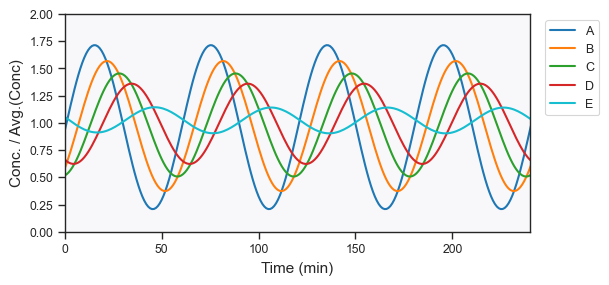

In [3]:
# Four steps reaction : A <--> B <--> C <--> D <--> E
# With fixed k1, k2, k3, k4, km1, km2, km3, km4

k1 = k2 = k3 = k4 = 0.1  # min-1
km1 = km2 = km3 = km4 = 0.001  # min-1


t = np.linspace(0, 1000, 1001)
x0 = 1, 0, 0, 0, 0  # initial conditions
sol = odeint(d4_rev_dt, x0, t, args=(k1, km1, k2, km2, k3, km3, k4, km4, kf))

t = t - 126  # Remove initial period during which the ODE system is stabilizing

A_overlay = sol[:, 0] / sol[:, 0].mean()
B_overlay = sol[:, 1] / sol[:, 1].mean()
C_overlay = sol[:, 2] / sol[:, 2].mean()
D_overlay = sol[:, 3] / sol[:, 3].mean()
E_overlay = sol[:, 4] / sol[:, 4].mean()

fig, ax = plt.subplots(figsize=(6, 2))
sns.lineplot(x=t, y=A_overlay, c="tab:blue", label="A", linewidth=1.5)
sns.lineplot(x=t, y=B_overlay, c="tab:orange", label="B", linewidth=1.5)
sns.lineplot(x=t, y=C_overlay, c="tab:green", label="C", linewidth=1.5)
sns.lineplot(x=t, y=D_overlay, c="tab:red", label="D", linewidth=1.5)
sns.lineplot(x=t, y=E_overlay, c="tab:cyan", label="E", linewidth=1.5)

ax.set_ylim(0, 2)
ax.set_xlim(0, 240)

ax.set_ylabel("Conc. / Avg.(Conc)", fontsize=11)
ax.set_xlabel("Time (min)", fontsize=11)

ax.legend(bbox_to_anchor=(1.02, 1.0), loc="upper left", fontsize=9)

ax.set_facecolor("#F8F8FB")
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=1.2, wspace=None, hspace=0.35
)

# plt.savefig('Scheme_4_rev_reactions.png', format='png', bbox_inches='tight', dpi=600)